In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.1 MB 6.4 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 144 kB 47.2 MB/s 
     |████████████████████████████████| 271 kB 44.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [ ]:
API_key = 'OFYE21323O0HHV4I'


In [ ]:
ts = TimeSeries(key = API_key,output_format='pandas')
data, meta = ts.get_intraday('MSFT', interval = '5min' , outputsize = 'full')

In [ ]:
data = data.reset_index()
data

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-04-12 20:00:00,283.02,283.29,283.02,283.29,1395.0
1,2022-04-12 19:55:00,282.98,283.00,282.98,283.00,12299.0
2,2022-04-12 19:50:00,282.90,282.99,282.86,282.99,1467.0
3,2022-04-12 19:45:00,282.87,282.94,282.87,282.90,3517.0
4,2022-04-12 19:40:00,282.80,282.94,282.76,282.94,2533.0
...,...,...,...,...,...,...
3567,2022-03-15 04:40:00,275.60,275.60,275.60,275.60,685.0
3568,2022-03-15 04:25:00,275.75,275.75,275.66,275.70,1276.0
3569,2022-03-15 04:20:00,275.80,276.00,275.75,275.75,1492.0
3570,2022-03-15 04:10:00,275.90,276.88,275.90,276.07,2853.0


In [ ]:
df = pd.DataFrame(data, columns=['date','4. close'])
df

,date,4. close
0,2022-04-12 20:00:00,283.29
1,2022-04-12 19:55:00,283.00
2,2022-04-12 19:50:00,282.99
3,2022-04-12 19:45:00,282.90
4,2022-04-12 19:40:00,282.94
...,...,...
3567,2022-03-15 04:40:00,275.60
3568,2022-03-15 04:25:00,275.70
3569,2022-03-15 04:20:00,275.75
3570,2022-03-15 04:10:00,276.07


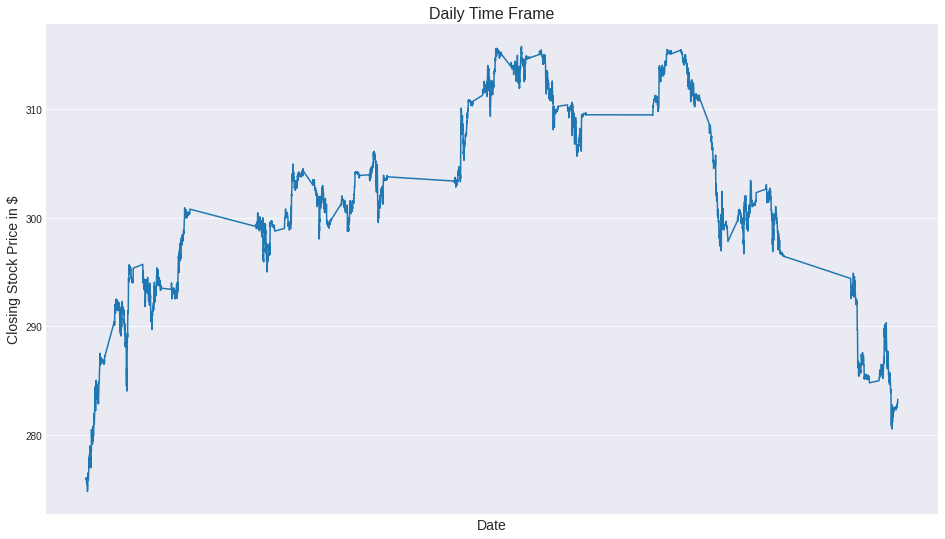

In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['date'], df['4. close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Daily Time Frame', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['4. close']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
print('Intercept: ', model.intercept_)

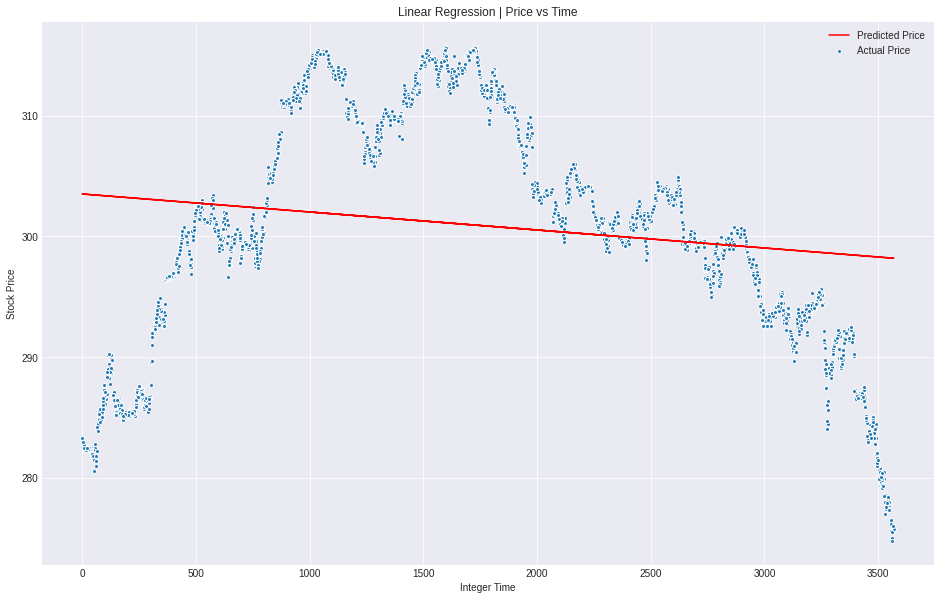

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['4. close']
y_pred = model.predict(X_test)

In [ ]:
df.head()
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))


In [ ]:
randints = np.random.randint(3567, size=25)
df_sample = df[df.index.isin(randints)]


In [ ]:

df_sample.head()

,date,4. close,Prediction
83,2022-04-12 12:45:00,284.8127,303.395197
284,2022-04-11 11:25:00,285.5200,303.095334
324,2022-04-11 08:05:00,292.9000,303.035659
329,2022-04-11 07:35:00,293.8900,303.028200
528,2022-04-08 04:05:00,302.6200,302.731321


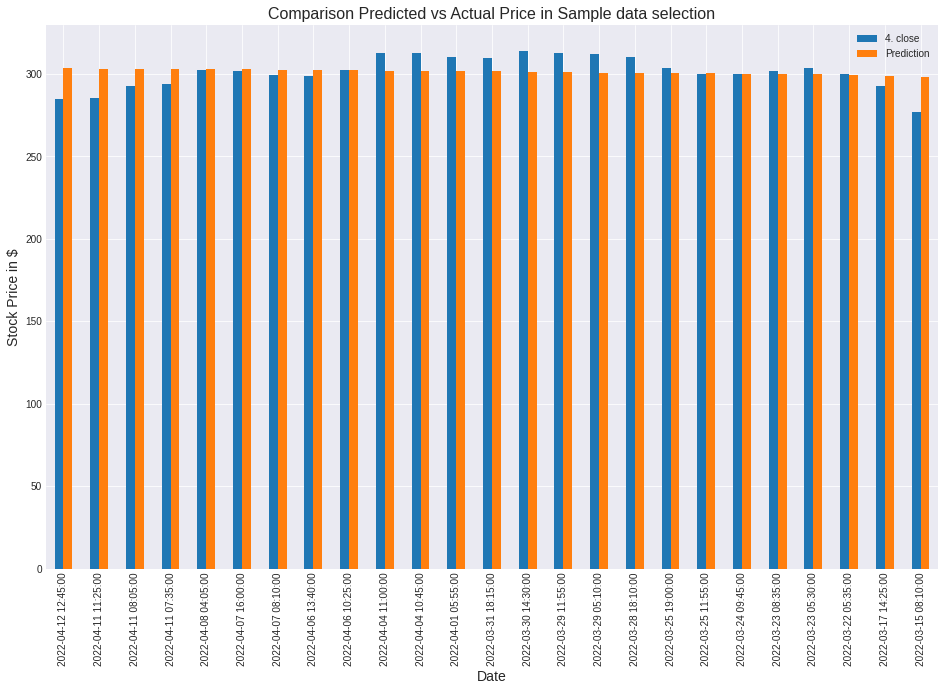

In [ ]:
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['4. close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

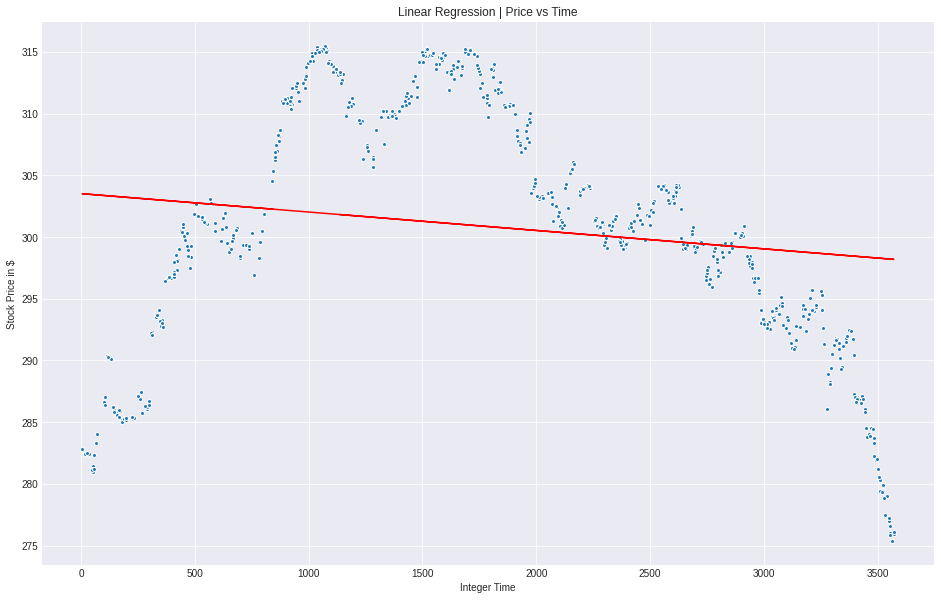

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Time')
plt.ylabel('Stock Price in $')

plt.show()

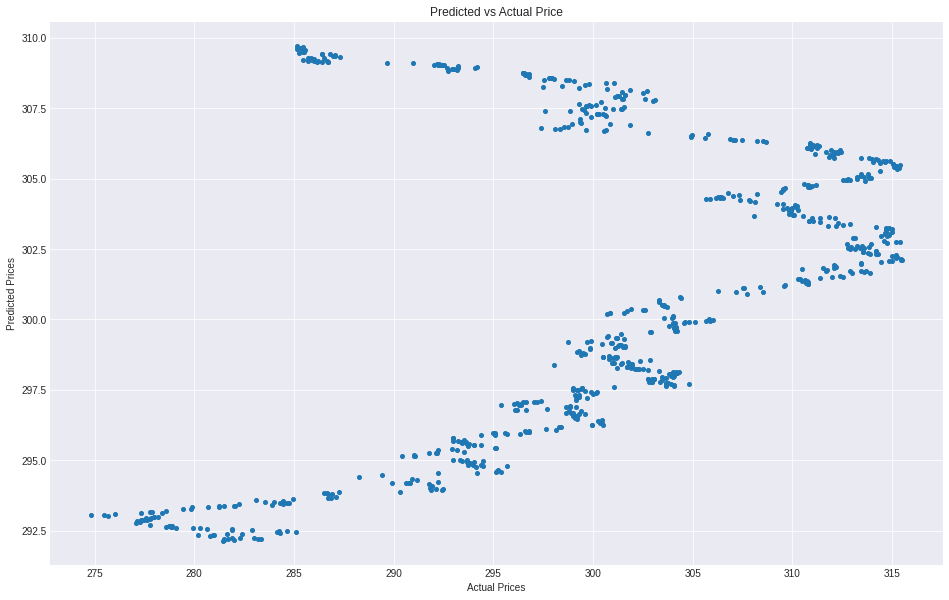

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


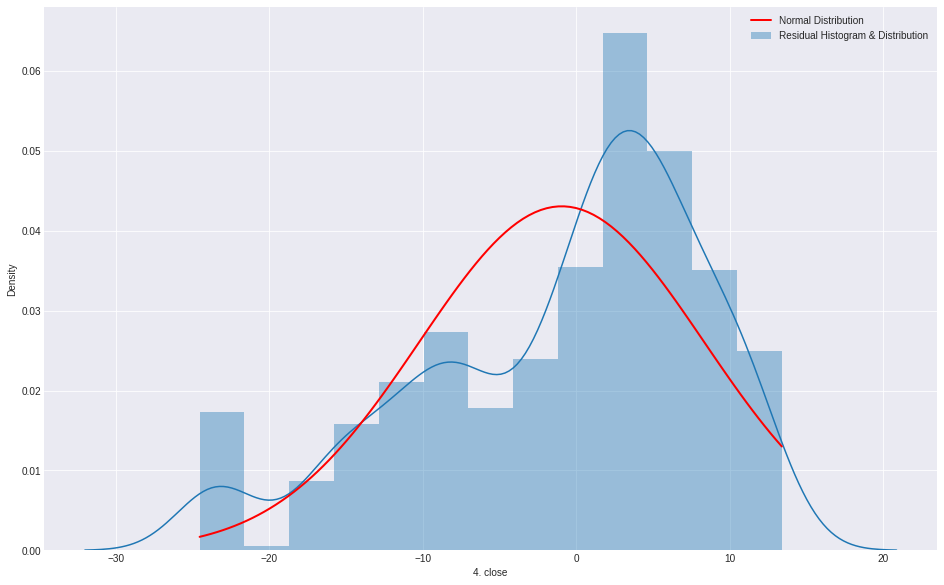

In [ ]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [ ]:
df.head()

,date,4. close,Prediction
0,2022-04-11 20:00:00,284.80,309.717133
1,2022-04-11 19:55:00,285.01,309.712202
2,2022-04-11 19:50:00,285.05,309.707271
3,2022-04-11 19:45:00,285.24,309.702341
4,2022-04-11 19:40:00,285.15,309.697410


In [ ]:
from sklearn import metrics
df['4. close'].describe()

count    3567.000000
mean      300.734479
std         9.930445
min       274.800000
25%       294.345000
50%       301.065000
75%       309.750000
max       315.745100
Name: 4. close, dtype: float64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.4177592938312715
Mean Squared Error: 86.76950403412903
Root Mean Squared Error: 9.315014977665308


In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.19000735920220158


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.19854457163726957